# Clothes Classification Based on Image with CNN #

* Convolutional Neural Network will be used as a classifier for clothes types based on their images.

In [38]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other:
import random

## Data Load ##

In [ ]:
# Data format: We have a matrix with each image label and each image pixel value (28x28 = 784) 1-channel Gray-Scale

In [39]:
# Load Data as Pandas Dataframe (# Train and Test Data separated already):

fashion_df = pd.read_csv('fashion-mnist-train.csv', sep = ',')

In [40]:
fashion_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Data Visualization ##

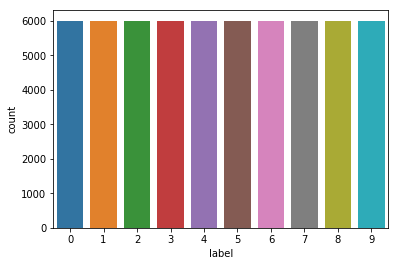

In [41]:
# Checking how many items we have for each class:
sns.countplot(fashion_df['label'], label = 'Count');

In [42]:
# Transform Dataframe to array in order to handle with image plot:
fashion_data = np.array(fashion_df, dtype = 'float32')

9.0


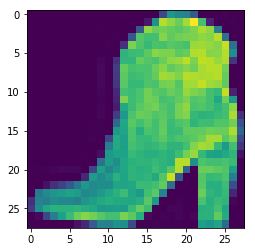

In [43]:
# Random Image plot check:
i = random.randint(1, 60000)
print(fashion_data[i,0])
plt.imshow(fashion_data[i,1:].reshape((28,28)))
#plt.imshow(fashion_data[i,1:].reshape((28,28)), cmap='gray');

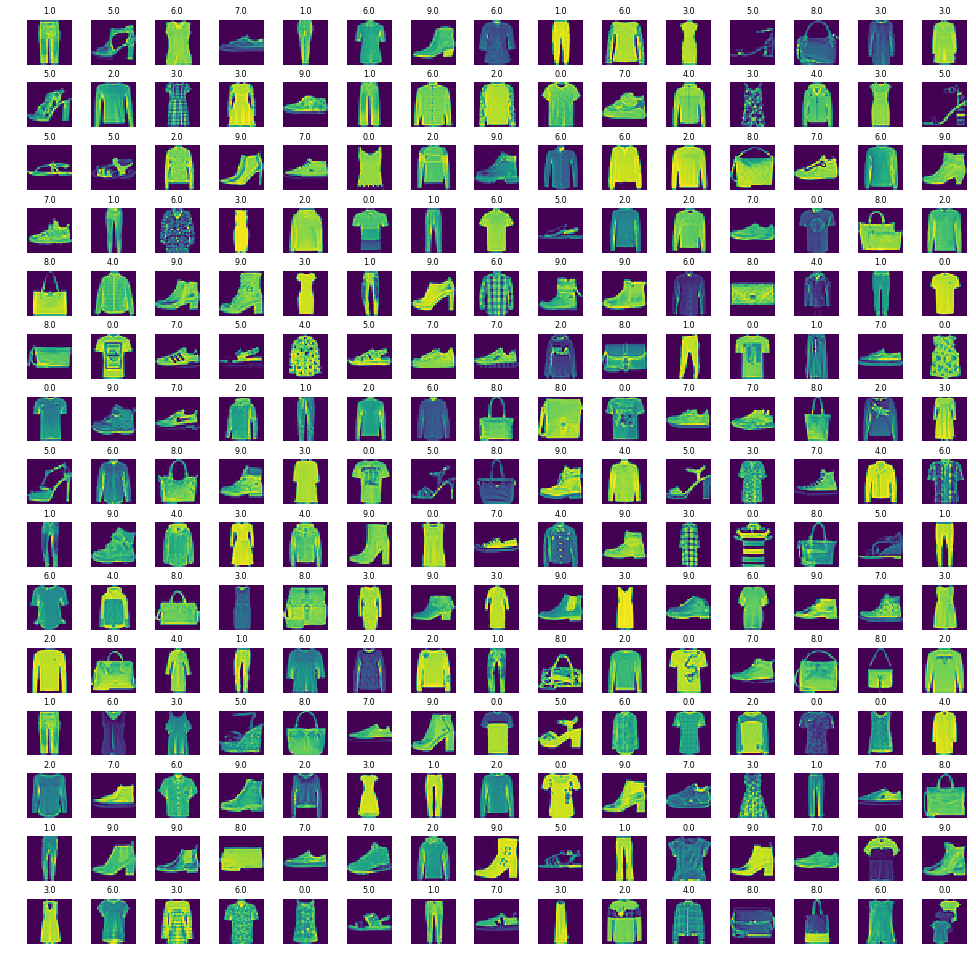

In [52]:
# Subplot loop to check image variety and their classification label:

W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_fashion = len(fashion_data)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_fashion)
    axes[i].imshow(fashion_data[index,1:].reshape((28,28)))
    axes[i].set_title(fashion_data[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Data Processing ##

In [54]:
# Normalization -> Get pixel intensity level between 0~1 for faster processing
X = fashion_data[:,1:] / 255 # Without the class label
Y = fashion_data[:,0]        # Only the class label as output

In [55]:
# Let's split data in train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5) # 80% train, 20% test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [56]:
# Lets transform array into a image format (28x28, 1 channel)

X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


## Tensorflow - Neural Network Setup ##

In [57]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf
from tensorflow.keras import layers, models

In [58]:
# NN Training Stopper Callback (after meeting desired condition)

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.999):
            print('\n\n\nReached desired accuracy. Training canceled! \n\n\n')
            self.model.stop_training = True
            
trainingStopCallback = haltCallback()

In [59]:
# Network Setup
cnn = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))
# Conv2D = convolutional layer, 32 = number of kernel filters, 3x3 = filter matrix size...
# relu as activation -> drop negative values
# Pooling Layer to 2x2
# More conv layers and pooling
# Flatten layer to transform into vector:
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.Flatten())
# Choose 64 hidden layers:
cnn.add(layers.Dense(64, activation = 'relu'))
# With 10 output classes:
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
epochs = 150
batch_size = 512

# Using Sparse, no need to encode output classes:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, callbacks = [trainingStopCallback])

Epoch 1/150
48000/48000 [==============================] - 41s 856us/sample - loss: 0.9266 - accuracy: 0.6699
Epoch 2/150
48000/48000 [==============================] - 37s 780us/sample - loss: 0.5138 - accuracy: 0.8098
Epoch 3/150
48000/48000 [==============================] - 38s 790us/sample - loss: 0.4430 - accuracy: 0.8401
Epoch 4/150
48000/48000 [==============================] - 38s 783us/sample - loss: 0.3972 - accuracy: 0.8591
Epoch 5/150
48000/48000 [==============================] - 37s 774us/sample - loss: 0.3621 - accuracy: 0.8706
Epoch 6/150
48000/48000 [==============================] - 38s 783us/sample - loss: 0.3408 - accuracy: 0.8784
Epoch 7/150
48000/48000 [==============================] - 38s 783us/sample - loss: 0.3268 - accuracy: 0.8831
Epoch 8/150
48000/48000 [==============================] - 39s 808us/sample - loss: 0.3085 - accuracy: 0.8897
Epoch 9/150
48000/48000 [==============================] - 41s 864us/sample - loss: 0.3007 - accuracy: 0.8918
Epoch 10/1

## Model Error Metrics and Results ##

In [29]:
# Testing model with the test data using evaluate:
evaluation = cnn.evaluate(X_test, y_test)
evaluation

12000/12000 [==============================] - 3s 258us/sample - loss: 0.7925 - accuracy: 0.9080


[0.7924675286316196, 0.908]

In [30]:
predicted_classes = cnn.predict_classes(X_test)
predicted_classes

array([4, 4, 0, ..., 5, 6, 9], dtype=int64)

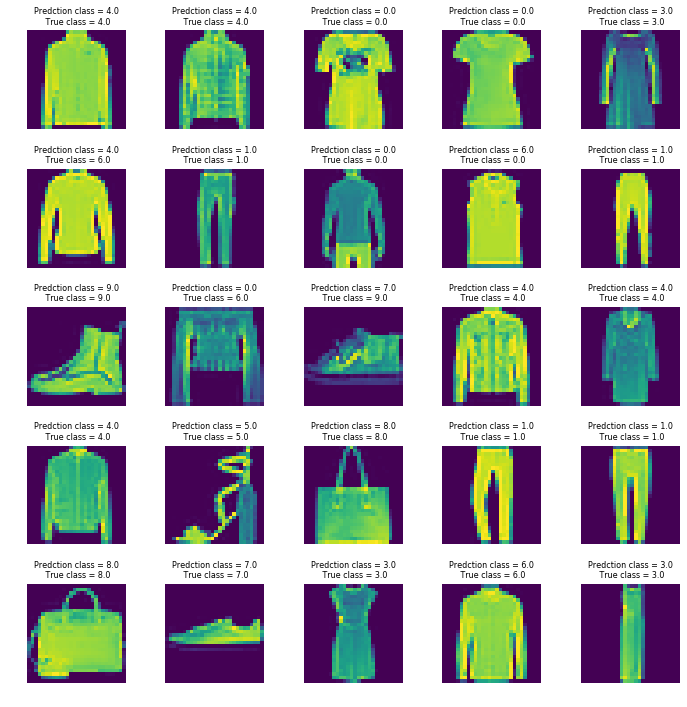

In [31]:
# Prediction Testing Visualization:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

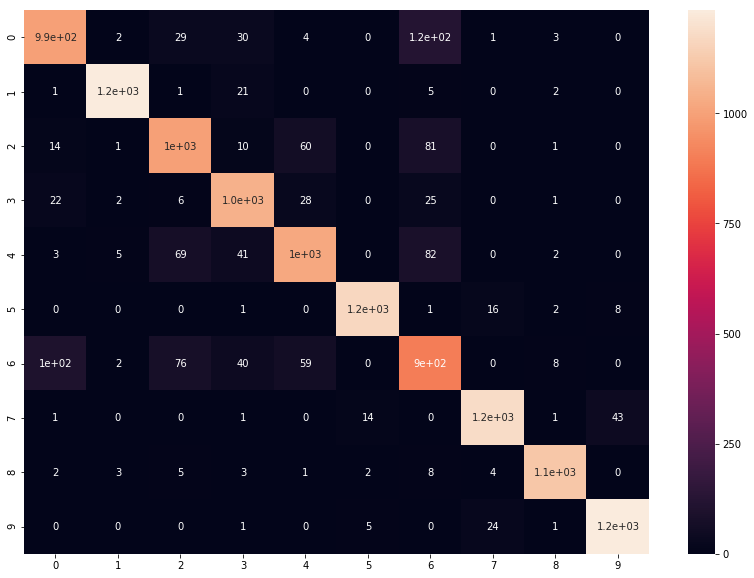

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [33]:
cm

array([[ 994,    2,   29,   30,    4,    0,  120,    1,    3,    0],
       [   1, 1231,    1,   21,    0,    0,    5,    0,    2,    0],
       [  14,    1,  997,   10,   60,    0,   81,    0,    1,    0],
       [  22,    2,    6, 1050,   28,    0,   25,    0,    1,    0],
       [   3,    5,   69,   41, 1020,    0,   82,    0,    2,    0],
       [   0,    0,    0,    1,    0, 1170,    1,   16,    2,    8],
       [ 100,    2,   76,   40,   59,    0,  900,    0,    8,    0],
       [   1,    0,    0,    1,    0,   14,    0, 1184,    1,   43],
       [   2,    3,    5,    3,    1,    2,    8,    4, 1116,    0],
       [   0,    0,    0,    1,    0,    5,    0,   24,    1, 1234]],
      dtype=int64)

In [34]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [37]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.86      1183
     Class 1       0.99      0.98      0.98      1261
     Class 2       0.84      0.86      0.85      1164
     Class 3       0.88      0.93      0.90      1134
     Class 4       0.87      0.83      0.85      1222
     Class 5       0.98      0.98      0.98      1198
     Class 6       0.74      0.76      0.75      1185
     Class 7       0.96      0.95      0.96      1244
     Class 8       0.98      0.98      0.98      1144
     Class 9       0.96      0.98      0.97      1265

   micro avg       0.91      0.91      0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

